In [3]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plt

In [4]:
data_promo={'Experience_Year':[2,4,5,3,6,5],
            'Performance':[3,4,5,3,4,4],
            'Promoted':["Yes","Yes","Yes","No","Yes",None]}
df=pd.DataFrame(data_promo)
print('DataSet: \t ')
display(df)

DataSet: 	 


,Experience_Year,Performance,Promoted
0,2,3,Yes
1,4,4,Yes
2,5,5,Yes
3,3,3,No
4,6,4,Yes
5,5,4,None


In [5]:
# Clean The Data
train_df=df.dropna()

In [6]:
train_df

,Experience_Year,Performance,Promoted
0,2,3,Yes
1,4,4,Yes
2,5,5,Yes
3,3,3,No
4,6,4,Yes


In [58]:
print(df.columns)

Index(['Age', 'Income', 'Buy'], dtype='object')


In [11]:
# Split The Data to Find Input and Output
X=train_df[['Experience_Year','Performance']]
y=train_df['Promoted']

In [12]:
# Create The Model
model=DecisionTreeClassifier()

In [13]:
# Train The Model
model.fit(X,y)

DecisionTreeClassifier()

In [17]:
# Pred
pred=model.predict([[5,4]])
print('Promotion Prediction: \t ',pred[0])

Promotion Prediction: 	  Yes


C:\Users\Nurhidayah R\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


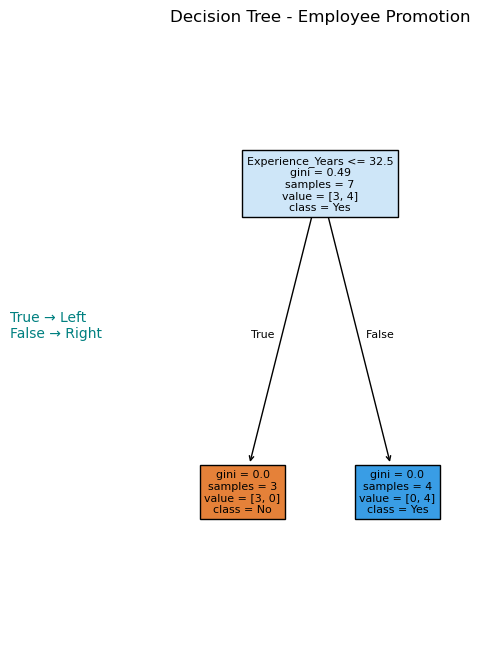

In [59]:
plt.figure(figsize=(4,8))
plot_tree(model,
          feature_names=['Experience_Years', 'Performance'], 
          class_names=[ 'No', 'Yes'], 
          filled=True)
plt.title('Decision Tree - Employee Promotion')
plt.text(-0.5, 0.5, 'True → Left\nFalse → Right', fontsize=10, color='teal', transform=plt.gca().transAxes)
plt. show()

###### Exercise 1

In [24]:
exp_years = float(input("Enter Years of Experience: "))
per_rating = float(input("Enter Performance Rating: "))
prediction = model.predict([[exp_years, per_rating]])
print("Promoted?" , "Yes" if prediction[0] == 1 else "No")

Enter Years of Experience:  6
Enter Performance Rating:  6


Promoted? No


C:\Users\Nurhidayah R\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [25]:
import numpy as np 
from sklearn.tree import DecisionTreeClassifier, plot_tree 
import pandas as pd 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder 
import matplotlib.pyplot as plt

In [32]:
data = {
    'Age': [25, 30, 45, 35, 22, 40, 50],
    'Income': ['Low', 'Medium', 'High', 'Medium', 'Low', 'High', 'High'],
    'Buy': ['No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes']
}
df=pd.DataFrame(data)
df

,Age,Income,Buy
0,25,Low,No
1,30,Medium,No
2,45,High,Yes
3,35,Medium,Yes
4,22,Low,No
5,40,High,Yes
6,50,High,Yes


In [33]:
encoder=OneHotEncoder(sparse_output=False)
income_encoded=encoder.fit_transform(df[['Income']])
income_encoded_df=pd.DataFrame(income_encoded,columns=encoder.get_feature_names_out(['Income']))
income_encoded_df

,Income_High,Income_Low,Income_Medium
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0


In [35]:
df_encoded = pd.concat([df[['Age', 'Buy']], income_encoded_df], axis=1)
df_encoded

,Age,Buy,Income_High,Income_Low,Income_Medium
0,25,No,0.0,1.0,0.0
1,30,No,0.0,0.0,1.0
2,45,Yes,1.0,0.0,0.0
3,35,Yes,0.0,0.0,1.0
4,22,No,0.0,1.0,0.0
5,40,Yes,1.0,0.0,0.0
6,50,Yes,1.0,0.0,0.0


In [37]:
X=df_encoded.drop('Buy',axis=1)
y=df_encoded['Buy']
y

0     No
1     No
2    Yes
3    Yes
4     No
5    Yes
6    Yes
Name: Buy, dtype: object

In [38]:
X=df_encoded.drop('Buy',axis=1)
y=df_encoded['Buy']
X

,Age,Income_High,Income_Low,Income_Medium
0,25,0.0,1.0,0.0
1,30,0.0,0.0,1.0
2,45,1.0,0.0,0.0
3,35,0.0,0.0,1.0
4,22,0.0,1.0,0.0
5,40,1.0,0.0,0.0
6,50,1.0,0.0,0.0


In [40]:
X=df_encoded.drop('Buy',axis=1)
y=df_encoded['Buy']
y = df_encoded['Buy'].map({'Yes': 1, 'No': 0})
X,y

(   Age  Income_High  Income_Low  Income_Medium
 0   25          0.0         1.0            0.0
 1   30          0.0         0.0            1.0
 2   45          1.0         0.0            0.0
 3   35          0.0         0.0            1.0
 4   22          0.0         1.0            0.0
 5   40          1.0         0.0            0.0
 6   50          1.0         0.0            0.0,
 0    0
 1    0
 2    1
 3    1
 4    0
 5    1
 6    1
 Name: Buy, dtype: int64)

In [43]:
model=DecisionTreeClassifier()
model.fit(X,y)

DecisionTreeClassifier()

In [44]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_encoded['Buy']) 

In [50]:
sample = pd.DataFrame({'Age': [28], 'Income': ['Medium']})
sample_encoded = encoder.transform(sample[['Income']])
sample_encoded_df = pd.DataFrame(sample_encoded, columns=encoder.get_feature_names_out(['Income']))
sample_final = pd.concat([sample[['Age']], sample_encoded_df], axis=1)

prediction = model.predict(sample_final)
predicted_label = label_encoder.inverse_transform(prediction)
print('Prediction for Age=28, Income=Medium:\t', predicted_label[0])

Prediction for Age=28, Income=Medium:	 No


In [54]:
person_age=int(input('Enter Age: \t '))
person_income=input('Enter Category Low, Medium or High')
person=pd.DataFrame({'Age':[person_age],'Income':[person_income]})
person_encoded=encoder.transform(person[['Income']])

person_encoded_df=pd.DataFrame(person_encoded,columns=encoder.get_feature_names_out(['Income']))
person_final=pd.concat([person[['Age']],person_encoded_df],axis=1)
prediction=model.predict(person_final)
predicted_label=label_encoder.inverse_transform(prediction)
print(f'Prediction for Age: {person_age}, Income:{person_income} is: \t ',predicted_label[0])

Enter Age: 	  88
Enter Category Low, Medium or High Low


Prediction for Age: 88, Income:Low is: 	  Yes


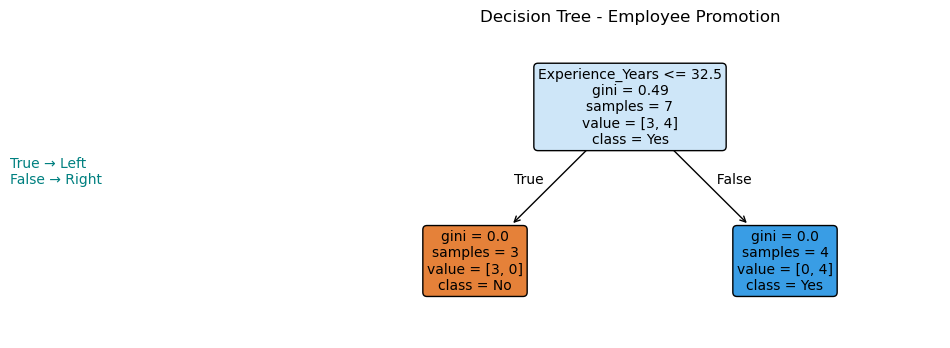

In [57]:
plt.figure(figsize=(8, 4))
plot_tree(
    model,
    feature_names=['Experience_Years', 'Performance'],
    class_names=['No', 'Yes'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title('Decision Tree - Employee Promotion')
plt.text(-0.5, 0.5, 'True → Left\nFalse → Right',
         fontsize=10, color='teal',
         transform=plt.gca().transAxes)
plt.show()